In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,name,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,0.000000,0.004968,0.143370,0.000000,0.000000,0.938635,0.480550,18
1,0.000443,0.003539,0.165469,0.220794,0.060606,0.945497,0.772254,40
2,0.000886,0.004556,0.100399,0.000000,0.000000,0.860134,0.557937,18
3,0.001329,0.000827,0.077330,0.129641,0.000000,0.994121,0.667010,10
4,0.001772,0.002318,0.182346,0.103005,0.010101,0.860134,0.344968,5
5,0.002215,0.003716,0.164833,0.119234,0.000000,0.870074,0.387616,3
6,0.002658,0.000137,0.029155,0.000000,0.000000,0.931638,0.814199,29
7,0.003101,0.000813,0.056125,0.112309,0.000000,0.870074,0.165778,2
8,0.003545,0.001649,0.110227,0.064135,0.020202,0.940937,0.498323,20
9,0.003988,0.000326,0.068629,0.000000,0.000000,0.885153,0.293394,3


In [3]:
X = dataset.iloc[:, [*range(0,6),7]].values
Y = dataset['guests'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 7


first_hidden_layer_size = 50
second_hidden_layer_size = 10
third_hidden_layer_size = 40

output_layer_size = 1


epochs_number = 100
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(third_hidden_layer_size, activation='relu'))


model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 1,391
Trainable params: 1,391
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1819 samples, validate on 455 samples
Epoch 1/100
1819/1819 [==============================] - 1s 490us/step - loss: 0.1281 - mean_absolute_error: 0.2156 - mean_squared_error: 0.1281 - val_loss: 0.0239 - val_mean_absolute_error: 0.1217 - val_mean_squared_error: 0.0239
Epoch 2/100
1819/1819 [==============================] - 0s 212us/step - loss: 0.0286 - mean_absolute_error: 0.1241 - mean_squared_error: 0.0286 - val_loss: 0.0280 - val_mean_absolute_error: 0.1101 - val_mean_squared_error: 0.0280
Epoch 3/100
1819/1819 [==============================] - 0s 191us/step - loss: 0.0346 - mean_absolute_error: 0.1267 - mean_squared_error: 0.0346 - val_loss: 0.0162 - val_mean_absolute_error: 0.0992 - val_mean_squared_error: 0.0162
Epoch 4/100
1819/1819 [==============================] - 0s 193us/step - loss: 0.0197 - mean_absolute_error: 0.1090 - mean_squared_error: 0.0197 - val_loss: 0.0170 - val_mean_absolute_error: 0.1002 - val_mean_squared_error: 0.0170
Epoch 5/100
1819/1819 [======

1819/1819 [==============================] - 0s 186us/step - loss: 0.0156 - mean_absolute_error: 0.0982 - mean_squared_error: 0.0156 - val_loss: 0.0134 - val_mean_absolute_error: 0.0913 - val_mean_squared_error: 0.0134
Epoch 37/100
1819/1819 [==============================] - 0s 216us/step - loss: 0.0154 - mean_absolute_error: 0.0977 - mean_squared_error: 0.0154 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923 - val_mean_squared_error: 0.0138
Epoch 38/100
1819/1819 [==============================] - 0s 201us/step - loss: 0.0154 - mean_absolute_error: 0.0978 - mean_squared_error: 0.0154 - val_loss: 0.0135 - val_mean_absolute_error: 0.0914 - val_mean_squared_error: 0.0135
Epoch 39/100
1819/1819 [==============================] - 0s 207us/step - loss: 0.0157 - mean_absolute_error: 0.0985 - mean_squared_error: 0.0157 - val_loss: 0.0133 - val_mean_absolute_error: 0.0911 - val_mean_squared_error: 0.0133
Epoch 40/100
1819/1819 [==============================] - 0s 192us/step - loss: 0.015

1819/1819 [==============================] - 0s 185us/step - loss: 0.0152 - mean_absolute_error: 0.0969 - mean_squared_error: 0.0152 - val_loss: 0.0129 - val_mean_absolute_error: 0.0898 - val_mean_squared_error: 0.0129
Epoch 72/100
1819/1819 [==============================] - 0s 182us/step - loss: 0.0150 - mean_absolute_error: 0.0962 - mean_squared_error: 0.0150 - val_loss: 0.0133 - val_mean_absolute_error: 0.0910 - val_mean_squared_error: 0.0133
Epoch 73/100
1819/1819 [==============================] - 0s 192us/step - loss: 0.0153 - mean_absolute_error: 0.0976 - mean_squared_error: 0.0153 - val_loss: 0.0134 - val_mean_absolute_error: 0.0918 - val_mean_squared_error: 0.0134
Epoch 74/100
1819/1819 [==============================] - 0s 165us/step - loss: 0.0152 - mean_absolute_error: 0.0978 - mean_squared_error: 0.0152 - val_loss: 0.0129 - val_mean_absolute_error: 0.0901 - val_mean_squared_error: 0.0129
Epoch 75/100
1819/1819 [==============================] - 0s 174us/step - loss: 0.015

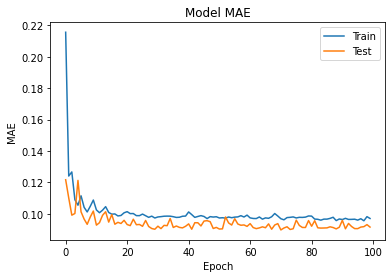

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

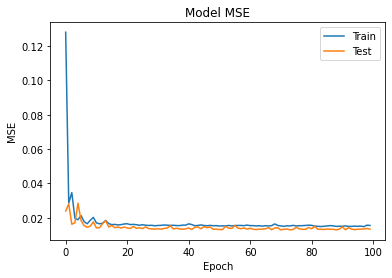

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

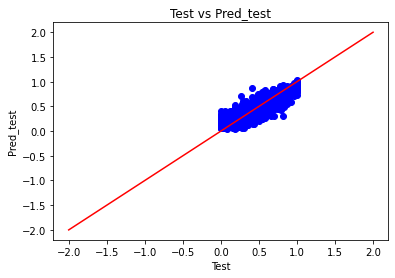

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

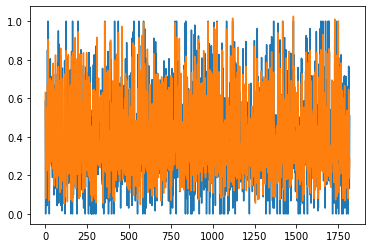

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

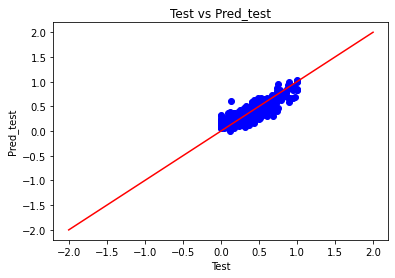

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

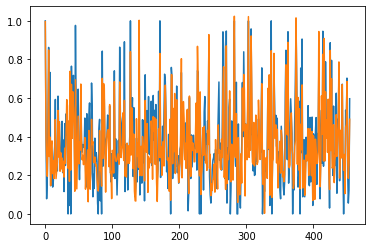

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.12176715452038578
0.11550247442879945


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9971425533294678, p = 0.0020198430866003036
Test k = 0.9937521815299988, p = 0.05765915289521217


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9971781373023987, p_s = 0.00035541984834708273
k_n = 19.455943650767075, p_n = 5.959303665397396e-05


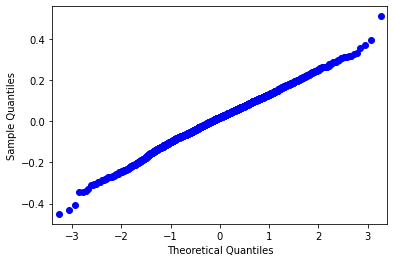

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

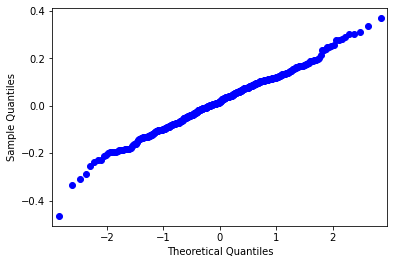

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

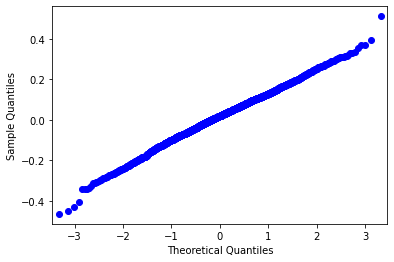

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

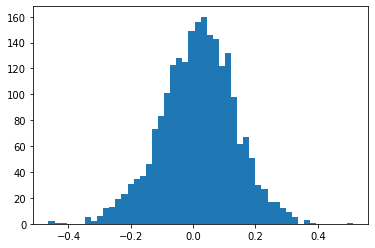

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')